# Lab 3: Data Visualization

For this lab, we will practice decision making on which data visualization model to use and also creating plots while recalling key routines from Lab 1 and Lab 2. We will be working with 'Tokyo Olympic 2021' data downloaded from Kaggle.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Obtaining Data

You are given two .csv files in the shared folder: 

*   Medals.csv contains the medal count of each team/NOC
*   Athletes.csv contains athlete name, team/NOC they represent, and the sport they competed in



Read-in your data

In [3]:
medals_df=pd.read_csv('shared/datasets/Medals.csv', header=None)
athletes_df=pd.read_csv('shared/datasets/Athletes.csv', header=None)

# Problem 1

Find the number of sports that are contested during the games - that is, how many unique values are in the 'Disciplines' column? Use a Python routine to find the number.

Using the same method for finding the number of sports contested, find the number of teams attending the games.

Hint: The Pandas dataframe has a built-in function called 'unique' to help you find the answer.

In [4]:
athletes_df.columns = ['Number','Name', 'NOC', 'Discipline']
athletes_df['Discipline'].nunique()

47

In [5]:
medals_df.columns = ['Number','Rank','NOC','Gold','Silver','Bronze','Total','Rank by Total']
medals_df['NOC'].nunique()

94

Choose any team and any sport you want. Display a dataframe of all the athletes competing in that sport representing your selected team.

How many athletes representing that team are competing? Use Python to determine the number.

In [9]:
eq_df = athletes_df.query('NOC == "United States of America" & Discipline == "Equestrian"')

In [10]:
len(eq_df)

11

# Problem 2

Create a visualization of the number of athletes per team sorted from largest to smallest.

Hints: 

Step 1: Determine an appropriate plot type. There are multiple options.

Step 2: Create a dataframe with the information needed to plot your visualization - in this case, you need a count of the number of athletes (numerical) per team (categorical). A grouping object will be appropriate here. Refer to the last few slides of Lecture 2.

Step 3: Sort your dataframe based on the count of athletes in descending order

Step 4: Create your plot with either seaborn or matplotlib. Include any appropriate titles, labels, and/or key information.

You can show more than one type of visualization if you wish.

In [97]:
abynoc = athletes_df.groupby('NOC')
aggabynoc = abynoc.agg({'Name':'count'}).reset_index()
aggabynoc=aggabynoc.sort_values(["Name"],ascending = False)
aggabynoc.columns = ['NOC','Count']
aggabynoc

,NOC,Count
196,United States of America,615
94,Japan,586
10,Australia,470
145,People's Republic of China,401
71,Germany,400
...,...,...
117,Marshall Islands,2
36,Central African Republic,2
177,St Vincent and the Grenadines,2
126,Myanmar,2


<AxesSubplot: xlabel='NOC', ylabel='Count'>

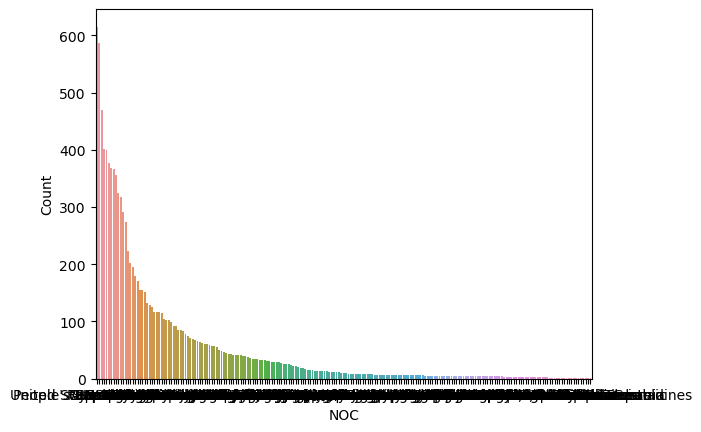

In [98]:
sns.barplot(aggabynoc, x='NOC',y='Count')

Display your new dataframe that shows the teams and a column that contains the number of athletes representing that category. You can just display the first 5 entries.

In [67]:
eqa_df = athletes_df.query('Discipline == "Equestrian"')
eqbynoc = eqa_df.groupby('NOC')
aggeqbynoc = eqbynoc.agg({'Name':'count'}).head(206)
aggeqbynoc.columns = ['Count']
aggeqbynoc.head(5)

,Count
NOC,
Argentina,4
Australia,10
Austria,5
Belarus,2
Belgium,10


# Problem 3

Does the number of team members effect the number of total medals won by a team?

Visualize an appropriate plot depicting the relationship between number of athletes and total number of medals earned for a team.

Step 1: Decide on an appropriate plot type based on the information that needs to be conveyed

Step 2: Create a new dataframe by merging the athletes dataframe and medals dataframe by team

Hint: First, rename the 'Team/NOC' attribute in the medals dataframe as 'NOC'

Then, perform a merge on your athlete dataframe and medals dataframe - that is, combine these two dataframes into one by merging on the 'NOC' column.

See example below on how to use merge. Also check out https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html.

In [55]:
### MERGE EXAMPLE
df1 = pd.DataFrame({'Name':['Student 1', 'Student 2', 'Student 3'], 'Student ID':['S1', 'S2', 'S3']})
df2 = pd.DataFrame({'Student ID':['S1', 'S2', 'S3'], 'Grade':['A', 'B','C']})

In [56]:
### MERGE EXAMPLE
df1

,Name,Student ID
0,Student 1,S1
1,Student 2,S2
2,Student 3,S3


In [ ]:
### MERGE EXAMPLE
df2

,Student ID,Grade
0,S1,A
1,S2,B
2,S3,C


In [57]:
### MERGE EXAMPLE
df3 = df1.merge(df2, on='Student ID')
df3

,Name,Student ID,Grade
0,Student 1,S1,A
1,Student 2,S2,B
2,Student 3,S3,C


In [69]:
df=medals_df.merge(aggabynoc, on='NOC')
df

,Number,Rank,NOC,Gold,Silver,Bronze,Total,Rank by Total,Count
0,0.0,1,United States of America,39,41,33,113,1,615
1,1.0,2,People's Republic of China,38,32,18,88,2,401
2,2.0,3,Japan,27,14,17,58,5,586
3,3.0,4,Great Britain,22,21,22,65,4,366
4,4.0,5,ROC,20,28,23,71,3,318
...,...,...,...,...,...,...,...,...,...
88,88.0,86,Ghana,0,0,1,1,77,14
89,89.0,86,Grenada,0,0,1,1,77,6
90,90.0,86,Kuwait,0,0,1,1,77,10
91,91.0,86,Republic of Moldova,0,0,1,1,77,19


Show a random sample of 5 datapoints in this newly created dataframe

In [59]:
df.sample(5)

,Number_x,Rank,NOC,Gold,Silver,Bronze,Total,Rank by Total,Number_y,Name,Discipline
6343,22.0,23,Sweden,3,6,0,9,26,417.0,ANGELDAL Filippa,Football
5679,17.0,18,Czech Republic,4,4,3,11,23,2448.0,DOSTAL Josef,Canoe Sprint
7157,31.0,32,Uzbekistan,3,0,2,5,42,8654.0,SAVKIN Alexander,Modern Pentathlon
940,1.0,2,People's Republic of China,38,32,18,88,2,10811.0,YANG Shuyu,3x3 Basketball
1962,3.0,4,Great Britain,22,21,22,65,4,10711.0,WYNNE-GRIFFITH Oliver,Rowing


The necessary information we need is the team name (NOC), the medal count (Count), and the total number of medals earned (Total).

You can either drop all unnecessary attributes or you can perform a column selection to create a new smaller dataframe.

Show this new smaller dataframe. Just first 5 entries is ok.

In [70]:
df_small = df[['NOC', 'Count', 'Total']]

In [71]:
df_small.head(5)

,NOC,Count,Total
0,United States of America,615,113
1,People's Republic of China,401,88
2,Japan,586,58
3,Great Britain,366,65
4,ROC,318,71


Now you are ready to plot your findings. Plot the relationship between the number of athletes and the total number of medals earns below.

<AxesSubplot: xlabel='Count', ylabel='Total'>

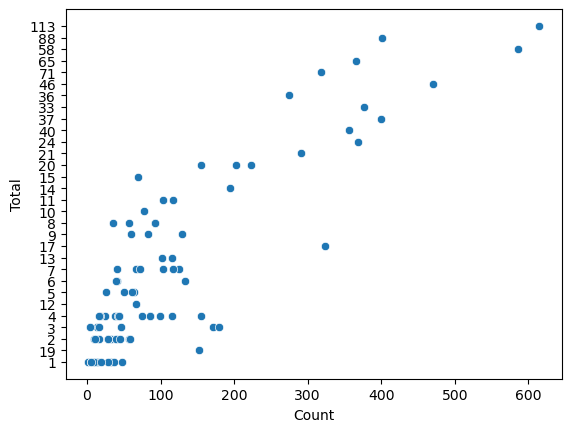

In [72]:
sns.scatterplot(y=df_small['Total'], x=df_small['Count']) 

Based on a quick look at the plot you have created, what is/are some reasonable conclusions you can draw?

Write your finding in a comment.

Based on the scatterplot that was created, I can conclude that there is a moderate, strong correlation between the number of athletes a team has and the number of medals that a team has. Furthermore, I can observe that the majority of teams have few athletes and few medals as there are more datapoints in the bottom lefthand corner. 

# Problem 4

Teams have a wide variety of number of members; some teams are smaller, some teams are larger. 

Define what is a small, medium, large, etc. team. Come up with your own definition. These will serve as your bins. An application of this is housing assignments for the teams (a planning committee needs to know the approximate number of athletes per team to be able to allot adequate housing blocks for them)

For example: you could consider a 'XS' team as one with 0-100 members, a 'S' team as one with 100-200 members, a 'M' team as one with 200-300 members, a 'L' team as one with 300-400 members, 'XL' team as one with 400-500 members, '2XL' team as one with 500-600 members, '3XL' team as one with 600-700 members. 

Create a visualization based on the number of teams that have a member count within each bin you have defined. 


XS team = 0-50 members, S team = 50-150 members, M team = 150-300 members, L team = 300-500 members, XL team = 500-1000

<AxesSubplot: xlabel='Count', ylabel='Count'>

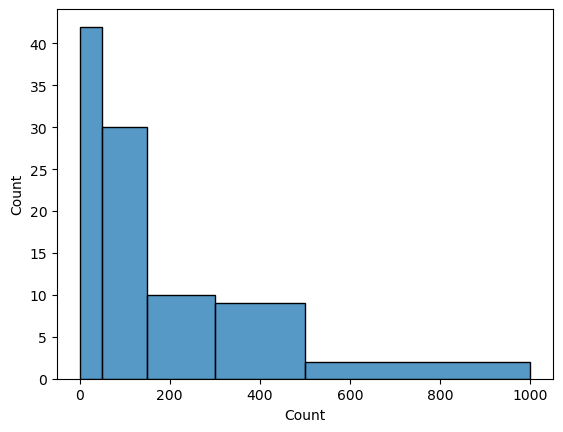

In [76]:
sns.histplot(data=df_small,
x="Count", stat='count',
bins=[0, 50, 150, 300, 500, 1000])